# Visualisasi Fungsi Sigmoid untuk Prediksi Resistensi Antibiotik

## Deskripsi
Notebook ini berisi kode untuk membuat visualisasi fungsi sigmoid yang digunakan dalam model Logistic Regression untuk memprediksi resistensi antibiotik pada Mycobacterium tuberculosis.

## Penjelasan Visualisasi
- **Fungsi Sigmoid**: Menampilkan transformasi logistik yang mengubah kombinasi linear fitur k-mer menjadi probabilitas resistensi (0-1)
- **Threshold**: Garis merah putus-putus pada y=0.5 sebagai batas keputusan antara Rentan (Susceptible) dan Resisten (Resistant)
- **Contoh Titik Data**: Empat titik sampel yang menunjukkan berbagai tingkat resistensi berdasarkan nilai probabilitas
- **Formula Matematika**: Rumus lengkap transformasi logistik yang digunakan dalam model

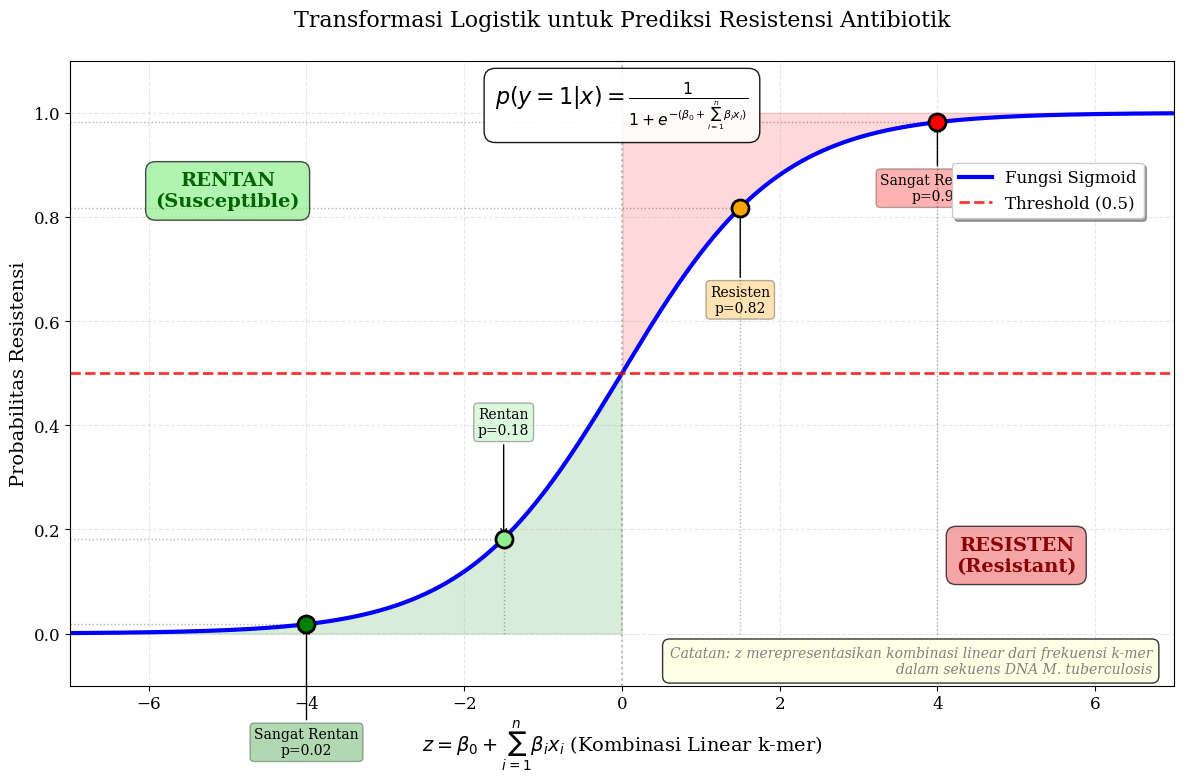

In [3]:
import numpy as np
import matplotlib.pyplot as plt

# Set style untuk publikasi
plt.rcParams['font.size'] = 12
plt.rcParams['axes.labelsize'] = 14
plt.rcParams['axes.titlesize'] = 16
plt.rcParams['legend.fontsize'] = 12
plt.rcParams['font.family'] = 'serif'

# Generate data untuk fungsi sigmoid
z = np.linspace(-8, 8, 1000)
sigmoid = 1 / (1 + np.exp(-z))

# Buat figure dengan ukuran lebih besar
fig, ax = plt.subplots(1, 1, figsize=(12, 8))

# Plot fungsi sigmoid
ax.plot(z, sigmoid, 'b-', linewidth=3, label='Fungsi Sigmoid')

# Threshold line
ax.axhline(y=0.5, color='red', linestyle='--', linewidth=2, alpha=0.8, label='Threshold (0.5)')
ax.axvline(x=0, color='gray', linestyle=':', alpha=0.5)

# Shaded regions
ax.fill_between(z[z<0], 0, sigmoid[z<0], alpha=0.15, color='green')
ax.fill_between(z[z>=0], sigmoid[z>=0], 1, alpha=0.15, color='red')

# Anotasi untuk region - posisi diatur agar tidak overlap
ax.text(-5, 0.85, 'RENTAN\n(Susceptible)', fontsize=14, fontweight='bold', 
        color='darkgreen', ha='center', va='center',
        bbox=dict(boxstyle="round,pad=0.5", facecolor='lightgreen', alpha=0.7))

ax.text(5, 0.15, 'RESISTEN\n(Resistant)', fontsize=14, fontweight='bold', 
        color='darkred', ha='center', va='center',
        bbox=dict(boxstyle="round,pad=0.5", facecolor='lightcoral', alpha=0.7))

# Contoh titik data dengan posisi yang diatur
example_z = [-4, -1.5, 1.5, 4]
example_p = 1 / (1 + np.exp(-np.array(example_z)))
colors = ['green', 'lightgreen', 'orange', 'red']
labels = ['Sangat Rentan', 'Rentan', 'Resisten', 'Sangat Resisten']

# Plot titik-titik contoh
for i, (z_val, p_val, color, label) in enumerate(zip(example_z, example_p, colors, labels)):
    ax.scatter(z_val, p_val, s=150, c=color, edgecolor='black', linewidth=2, zorder=5)

# Anotasi untuk titik-titik dengan posisi yang berbeda untuk menghindari overlap
annotations_config = [
    (example_z[0], example_p[0], labels[0], colors[0], -0.25),  # Sangat Rentan - bawah
    (example_z[1], example_p[1], labels[1], colors[1], 0.2),    # Rentan - atas
    (example_z[2], example_p[2], labels[2], colors[2], -0.2),   # Resisten - bawah
    (example_z[3], example_p[3], labels[3], colors[3], -0.15)   # Sangat Resisten - bawah
]

for z_val, p_val, label, color, offset in annotations_config:
    ax.annotate(f'{label}\np={p_val:.2f}', 
                xy=(z_val, p_val), 
                xytext=(z_val, p_val + offset),
                ha='center',
                fontsize=10,
                bbox=dict(boxstyle="round,pad=0.3", facecolor=color, alpha=0.3),
                arrowprops=dict(arrowstyle='->', connectionstyle='arc3,rad=0'))

# Formula dalam plot - posisi di bagian atas
formula_text = r'$p(y=1|x) = \frac{1}{1 + e^{-(\beta_0 + \sum_{i=1}^{n}\beta_i x_i)}}$'
ax.text(0.5, 0.97, formula_text, transform=ax.transAxes, 
        fontsize=16, ha='center', va='top',
        bbox=dict(boxstyle="round,pad=0.5", facecolor='white', alpha=0.9))

# Labels dan formatting
ax.set_xlabel(r'$z = \beta_0 + \sum_{i=1}^{n}\beta_i x_i$ (Kombinasi Linear k-mer)', fontsize=14)
ax.set_ylabel('Probabilitas Resistensi', fontsize=14)
ax.set_title('Transformasi Logistik untuk Prediksi Resistensi Antibiotik', fontsize=16, pad=25)

# Grid
ax.grid(True, alpha=0.3, linestyle='--')
ax.set_xlim(-7, 7)
ax.set_ylim(-0.1, 1.1)

# Legend - posisi di kanan atas
ax.legend(loc='upper right', frameon=True, fancybox=True, shadow=True, bbox_to_anchor=(0.98, 0.85))

# Tambahkan penjelasan k-mer - posisi di kanan bawah
info_text = "Catatan: z merepresentasikan kombinasi linear dari frekuensi k-mer\n" + \
            "dalam sekuens DNA M. tuberculosis"
ax.text(0.98, 0.02, info_text, transform=ax.transAxes, 
        fontsize=10, style='italic', color='gray', ha='right',
        bbox=dict(boxstyle="round,pad=0.5", facecolor='lightyellow', alpha=0.8))

# Tambahkan garis bantu untuk visualisasi lebih jelas
for z_val, p_val in zip(example_z, example_p):
    ax.plot([z_val, z_val], [0, p_val], 'k:', alpha=0.3, linewidth=1)
    ax.plot([-7, z_val], [p_val, p_val], 'k:', alpha=0.3, linewidth=1)

plt.tight_layout()
plt.show()